## Ulike plot for visualisering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
import sys
sys.path.insert(0,'../../src') #Sjekker om SRC mappa kan importerast


In [2]:
from pandasql import sqldf
from statistiske_maal import beregne_statistiske_verdier # funksjon i src som berkner gjennomsnitt og median
from plot_funksjon import plott_smart_scatter_2D, plott_smart_scatter_3D, forenklet_plot_funksjon, opprett_liste_over_fire_subplots #Visuliseringsfunksjoner fra source

### Leser inn data for Lørdagene

Her bruker man den importert funksjonen beregne_statistiske_verdier fra statistiske_maal i src-mappa, til å beregne statistiske verdier som gjennomsnitt, medianverdi og standardavvik til datasettet df. Man bruker numpy-biblioteket sine innebygde funksjoner for beregningen i beregne_statistiske_verdier funksjonen

In [36]:
file_path_3 = os.path.join("../..", "data", "filtered_data_Saturday.csv")
df = pd.read_csv(file_path_3)
#Velger kolonner vi bergner statistikken for
kolonner = ['Temperatur (°C)', 'Vindhastighet (km/t)', 'Trykk', 'Nedbør (mm)']
beregne_statistiske_verdier(df, kolonner) # kjører statistikk funksjonen


Temperatur (°C)
 Gjennomsnitt: 1.82
 Median 3.20
 Standardavvik: 3.59

Vindhastighet (km/t)
 Gjennomsnitt: 12.21
 Median 6.80
 Standardavvik: 10.39

Trykk
 Gjennomsnitt: 1015.32
 Median 1018.00
 Standardavvik: 18.43

Nedbør (mm)
 Gjennomsnitt: 0.12
 Median 0.00
 Standardavvik: 0.31



### Filtrering av data på Lørdager klokka 10

In [48]:
file_path_4 = os.path.join("../..", "data", "trondheim_vaerdata_full_1.csv")

df = pd.read_csv(file_path_4)

#print(df.dtypes)

df['Tidspunkt'] = pd.to_datetime(df['Tidspunkt'])
df['weekday'] = df['Tidspunkt'].dt.strftime('%A') # henter vekedagen
df['hour'] = df['Tidspunkt'].dt.hour # Henter klokkeslettet
 
#setter vekedagen til lørdag oog tidspunktet til klokka 10
filtered_df = df[(df['weekday'].isin(['Saturday'])) & (df['hour'] == 10)]



### Finner data der isbading egner seg med Pandas og Pandasql

In [49]:

#Bruker pandasql for å manipulera dataen
file_path_5 = os.path.join("../..", "data", "trondheim_vaerdata_full_1.csv")
df = pd.read_csv(file_path_5)

#Finner datoen
df["Dato"] = pd.to_datetime(df["Tidspunkt"]).dt.date
df_dager = df.groupby("Dato").agg({ #Snitt for vær etter dato
    "Temperatur (°C)" : "mean",
    "Vindhastighet (km/t)" : "mean",
    "Nedbør (mm)" : "mean"
}).reset_index()
#Legger inn krav for gode isbadingsforhold
df_isbading = df_dager[
    (df_dager["Temperatur (°C)"].between(-5, 2)) & 
    (df_dager["Nedbør (mm)"] == 0) &
    (df_dager["Vindhastighet (km/t)"] < 6) 
    ]

print(df_isbading)




          Dato  Temperatur (°C)  Vindhastighet (km/t)  Nedbør (mm)
12  2025-01-28        -0.345833              5.766667          0.0
26  2025-02-11        -2.570833              4.829167          0.0
27  2025-02-12        -1.308333              4.033333          0.0
28  2025-02-13        -2.983333              5.645833          0.0
55  2025-03-12        -3.133333              3.879167          0.0


### Plotter i ett 2D diagram med Scatterplot, isbadvennlige dager

Bruker en importert funksjon fra plot_funksjon i src-mappa til å visualisere de varmeste dagene med lite nedbør og vind i et smart scatter 2D plot. Dette plotet vil vise sammenhengen mellom nedbør, temperatur og vindhastighet

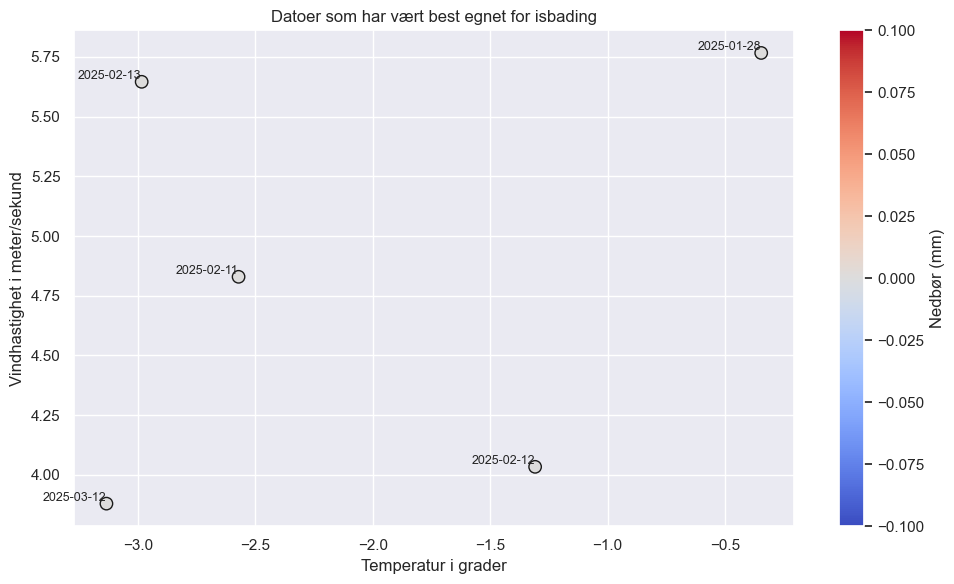

In [50]:
plott_smart_scatter_2D(
    df = df_isbading,
    x_col = "Temperatur (°C)",
    y_col = "Vindhastighet (km/t)", 
    color_col = "Nedbør (mm)", 
    x_label = "Temperatur i grader",
    y_label = "Vindhastighet i meter/sekund",
    title= "Datoer som har vært best egnet for isbading", 
    colorbar_label = "Nedbør (mm)", 
    text_labels_col = "Dato"
)

### Scatterplot i 3D

Her bruker man også en importert funksjon fra plot_funksjon i src-mappa til visualisering. Dette plottet er en 3D-visualisering som får fram sammenhengen mellom vindhastighet, temperatur og nedbørsmengde ennå tydeligere. Er imidlertid vanskligere å lese enn 2D-plottet ovenfor


c:\Users\eriks\OneDrive\Dokumenter\C++\Python\Mappeprosjekt_felles\Milj-dataanalyseapplikasjon\notebooks\API_Weather\../../src\plot_funksjon.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[dato_col] = pd.to_datetime(df[dato_col])


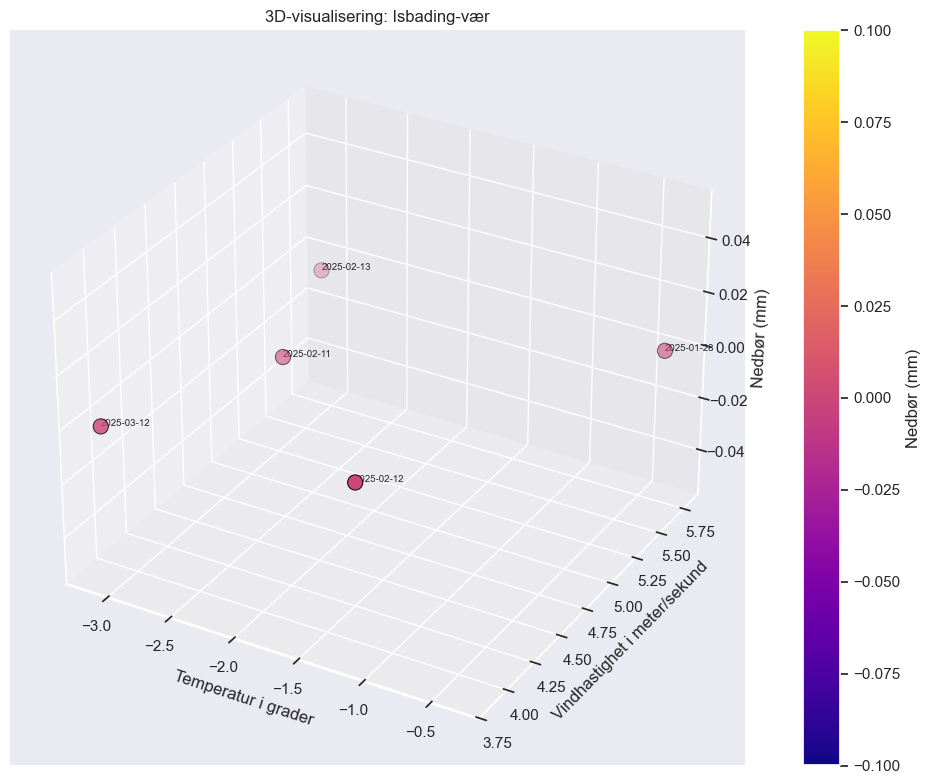

In [51]:
plott_smart_scatter_3D(
    df = df_isbading,
    x_col = "Temperatur (°C)",
    y_col = "Vindhastighet (km/t)", 
    z_col = "Nedbør (mm)", 
    dato_col = "Dato", 
    x_label = "Temperatur i grader",
    y_label = "Vindhastighet i meter/sekund",
    z_label = "Nedbør (mm)",
    title = "3D-visualisering: Isbading-vær"
)

### Sammenligner med Seaborn

<Axes: xlabel='Tidspunkt', ylabel='Måling'>

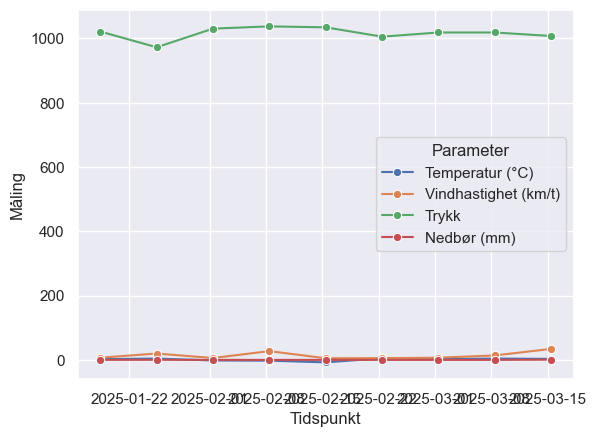

In [52]:
#Erstatter Matplotlib med seaborn
sns.set_theme(style="darkgrid")
#datasett lengre for at det skal bli enkelt og plotte
df_melted = filtered_df.melt(id_vars=['Tidspunkt'],
                             value_vars=['Temperatur (°C)', 'Vindhastighet (km/t)', 'Trykk', 'Nedbør (mm)'], 
                             var_name='Parameter', 
                             value_name='Måling')

#lager linjeplot
sns.lineplot(data=df_melted, x = 'Tidspunkt', y = 'Måling', hue='Parameter', marker="o")


### Plot for temperatur, vind, nedbør og trykk

Her importerer man de to funksjonene forenklet_plot_funksjon og opprett_liste_over_fire_subplots fra plot_funksjon i src-mappa. Ved å kjøre denne koden får man visualisert hvordan temperaturen, vindhastigheten, trykket og nedbøret har vært (klokka ti) for alle lørdagene i løpet av perioden januar til mars i et og samme plot


<Figure size 1000x1000 with 0 Axes>

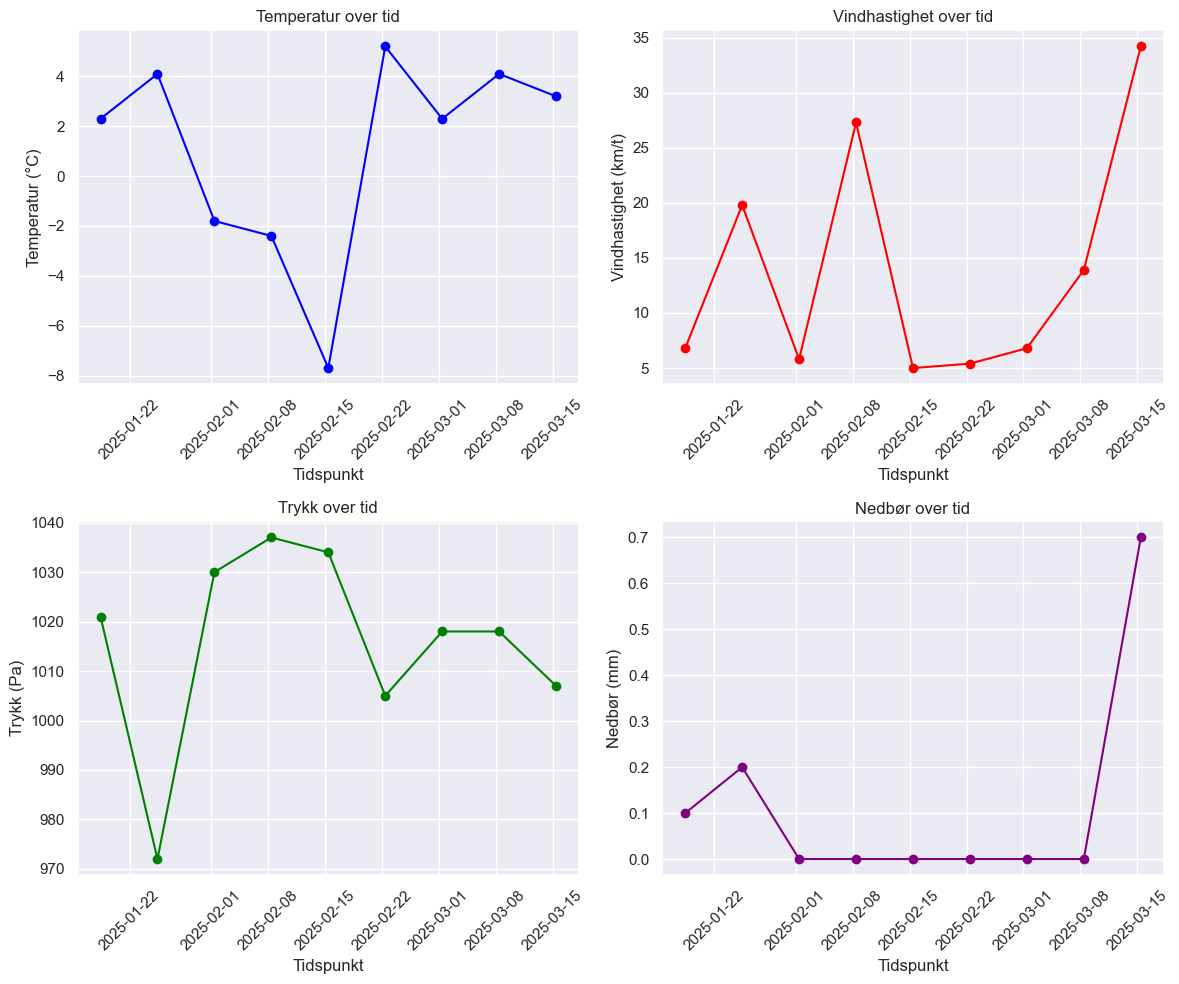

In [53]:
filtered_df['Tidspunkt'] = pd.to_datetime(filtered_df['Tidspunkt'])
plt.figure(figsize=(10, 10))#plotter

plot_config = opprett_liste_over_fire_subplots()

for config in plot_config:
    forenklet_plot_funksjon(
        df = filtered_df, 
        x_col = "Tidspunkt",
        y_col =  config["y_col"], 
        subplot_index = config["subplot_index"], 
        x_label = "Tidspunkt",
        y_label = config["y_label"],
        title = config["title"],
        farge = config["farge"], 
        xticks_rotation = 45
    )

plt.tight_layout()
plt.show()

### Sammenligning av temperatur og trykk

Importerer forenklet_plot_funksjon fra plot_funksjon i src-mappa for å illustrere om/hvordan temperaturverdier korrelerer til trykkverdier. Denne informasjonen kan man senere bruke for å finne trender i været. For eksempel ser man av dataen at det er sjeldent at det er både kaldt og lavt trykk


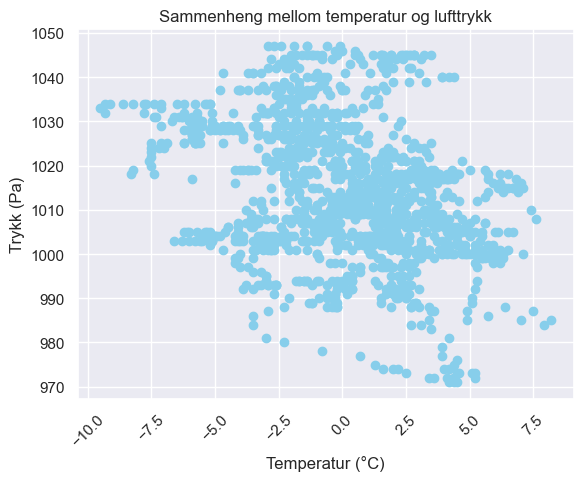

In [57]:
#Dataanalyse mellom temperatur og trykket med scatterplot
forenklet_plot_funksjon(
        df = df, 
        x_col = "Temperatur (°C)",
        y_col =  "Trykk", 
        subplot_index = (1, 1, 1), 
        x_label = "Temperatur (°C)",
        y_label = "Trykk (Pa)",
        title = "Sammenheng mellom temperatur og lufttrykk",
        farge = "skyblue", 
        plot_type = "scatter"
    )
plt.show()


### Scatterplot av temperatur i forhold til vind

Gjenbruker forenklet_plot_funksjon for å illustrere om/hvordan temperatur korrelerer til vindhastighet, ved bruk av et scatterplot. Fra plottet ser vi at det gjerne må høyere temperaturverdier til, for å få store vindhastigheter


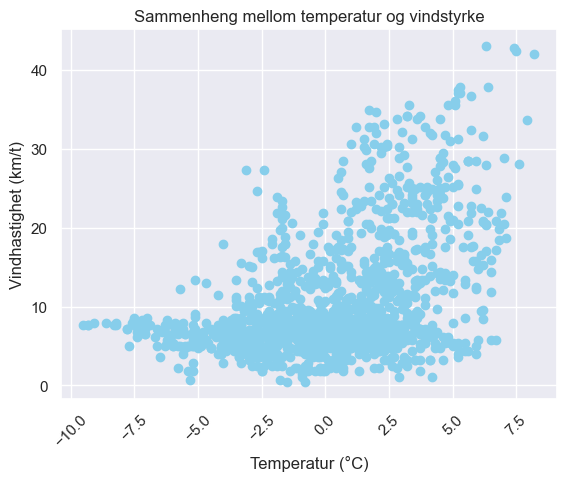

In [60]:
forenklet_plot_funksjon(
        df = df, 
        x_col = "Temperatur (°C)",
        y_col =  "Vindhastighet (km/t)", 
        subplot_index = (1, 1, 1), 
        x_label = "Temperatur (°C)",
        y_label = "Vindhastighet (km/t)",
        title = "Sammenheng mellom temperatur og vindstyrke",
        farge = "skyblue", 
        plot_type = "scatter"
    )
plt.show()

### Trykkvariasjon for en gitt tidsperiode

In [61]:

file_path_6 = os.path.join("../..", "data", "trondheim_vaerdata_full_1.csv")
df = pd.read_csv(file_path_6)

df["Tidspunkt"] = pd.to_datetime(df["Tidspunkt"])
df = df.sort_values("Tidspunkt")

df = df.set_index("Tidspunkt")
#daglig snitt
df_daglig = df.select_dtypes(include='number').resample('D').mean().reset_index()



Her gjenbruker man igjen forenklet_plot_funksjon for å lage et plott som viser trykkvariasjoner gjennom hele perioden som det er hentet ut data for - fra januar til mars. Til forksjell fra trykkplottet i det samlede oversiktsplottet (plottet ovenfor som har med temperatur, trykk, nedbør og vind i et plott) er trykkvariasjonsplottet under mer detaljert og helhetlig. Det samlede oversiktsplottet baserer seg nemlig på den uthentede verdien kl. 10 hver lørdag, mens trykkvariasjonsplottet bruker daglige gjennomsnitverdier. Dermed får man et bedre estimat på hvordan trykket faktisk har endret seg over tid gjennom den uthentede tidsperioden

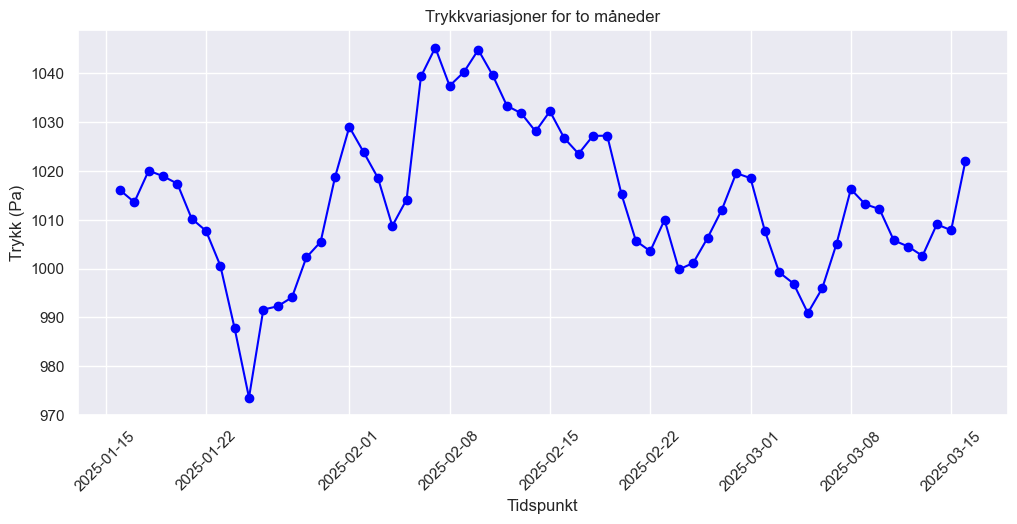

In [66]:
plt.figure(figsize=(12, 5))

forenklet_plot_funksjon(
    df = df_daglig, 
    x_col = "Tidspunkt",
    y_col =  "Trykk", 
    subplot_index = (1, 1, 1), 
    x_label = "Tidspunkt",
    y_label = "Trykk (Pa)",
    title = "Trykkvariasjoner for to måneder",
    farge = "blue", 
    xticks_rotation = 45
    
)

### Temperaturvariasjonen for en gitt tidsperiode

Her gjenbruker man igjen forenklet_plot_funksjon for å lage et plott som viser temperaturvariasjoner gjennom hele perioden som det er hentet ut data for - fra januar til mars. Dermed oppnår man å få et bedre estimat på hvordan temperaturen har endret seg over tid gjennom den uthentede tidsperioden. Sammenlignet med det grovere estimatet fra oversiktsplottet ser man en korrelasjon for både trykkvariasjons- og temperaturvariasjonsplottet. Grafene viser relativt like trender

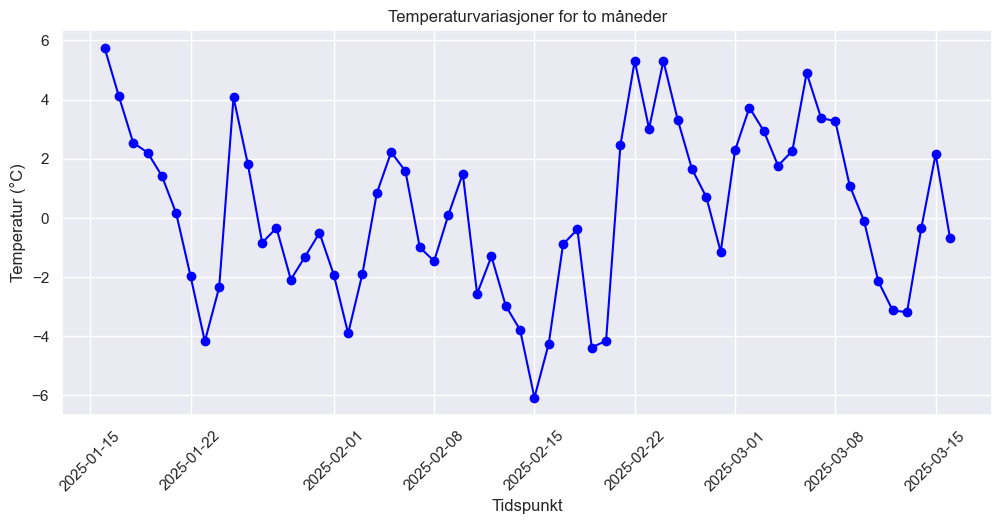

In [70]:
plt.figure(figsize=(12, 5))
forenklet_plot_funksjon(
    df = df_daglig, 
    x_col = "Tidspunkt",
    y_col =  "Temperatur (°C)", 
    subplot_index = (1, 1, 1), 
    x_label = "Tidspunkt",
    y_label = "Temperatur (°C)",
    title = "Temperaturvariasjoner for to måneder",
    farge = "blue", 
    xticks_rotation = 45
    
)